In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
X = np.array([[-1,-1],[-2,-1],[1,1],[2,1],[-1,1],[-1,2],[1,-1],[1,-2]])
y = np.array([0,0,1,1,2,2,3,3])
# y=np.array([1,1,2,2,3,3,4,4])
# clf = SVC(decision_function_shape="ovr",probability=True)
clf = SVC(probability=True)
clf.fit(X, y)
print(clf.decision_function(X))  #  这个预测结果使数据点到决策边界之间的距离
'''
对于n分类，会有n个分类器，然后，任意两个分类器都可以算出一个分类界面，这样，用decision_function()时，对于任意一个样例，就会有n*(n-1)/2个值。
任意两个分类器可以算出一个分类界面，然后这个值就是距离分类界面的距离。
我想，这个函数是为了统计画图，对于二分类时最明显，用来统计每个点离超平面有多远，为了在空间中直观的表示数据以及画超平面还有间隔平面等。
decision_function_shape="ovr"时是4个值，为ovo时是6个值。
'''
print(clf.predict(X)) # 这个预测结果为具体的类别
clf.predict_proba(X) #这个预测结果为概率值。

[[ 3.49999336 -0.20552375  0.84259717  1.86293322]
 [ 3.49992488 -0.17919731  1.85287033  0.8264021 ]
 [-0.2054857   3.49995531  1.86294918  0.8425812 ]
 [-0.17923535  3.49996292  0.82640879  1.85286364]
 [ 1.86307951  0.84242239  3.5        -0.20550189]
 [ 0.82640739  1.85284335  3.49991823 -0.17916898]
 [ 0.84243835  1.86306354 -0.20546385  3.49996196]
 [ 1.85285004  0.8264007  -0.17920702  3.49995628]]
[0 0 1 1 2 2 3 3]


array([[0.90855926, 0.03930758, 0.02534255, 0.02679061],
       [0.90492185, 0.04379803, 0.02641633, 0.02486378],
       [0.03952101, 0.90844925, 0.02684317, 0.02518658],
       [0.04391918, 0.9049366 , 0.02490113, 0.0262431 ],
       [0.02700676, 0.02515522, 0.90835542, 0.03948261],
       [0.02503905, 0.02624945, 0.90478338, 0.04392812],
       [0.02467226, 0.02708404, 0.03952641, 0.90871729],
       [0.02573126, 0.02512904, 0.04393477, 0.90520493]])

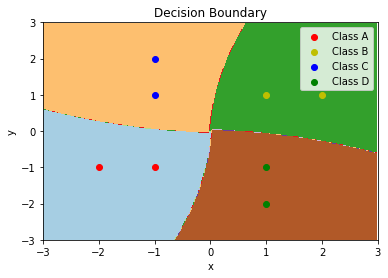

In [7]:
#画图
plot_step=0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))
 
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) #对坐标网格上的点进行预测，来画分界面。其实最终看到的类的分界线就是分界面的边界线。
Z = Z.reshape(xx.shape)
# 用contourf也可对svm可视化
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis("tight")
 
class_names="ABCD"
plot_colors="rybg"
for i, n, c in zip(range(4), class_names, plot_colors):
    idx = np.where(y == i) #i为0或者1，两个类
    plt.scatter(X[idx, 0], X[idx, 1],
                c=c, cmap=plt.cm.Paired,
                label="Class %s" % n)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend(loc='upper right')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Decision Boundary')
plt.show()